In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs
# !pip install lxml

In [2]:
# !pip install matplotlib
# !pip install lxml

In [3]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=352820&page=1'
# url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
# 유저 에이전트를 인자로 넣어서 get 함수를 사용하면 크롤링 방지 차단을 뚫고 크롤링을 할 수 있습니다
response = requests.get(url, headers=headers)
response.text

html = bs(response.text, 'html.parser')
html_table = html.select("table")
# print(html_table)

In [4]:
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 2


In [5]:
table[0].dropna() # 결측값을 제거

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.01.29,209000.0,7500.0,216500.0,218000.0,208000.0,107141.0
2,2024.01.26,216500.0,500.0,216000.0,221500.0,215000.0,98877.0
3,2024.01.25,216000.0,6000.0,221500.0,222500.0,209500.0,265472.0
4,2024.01.24,222000.0,3000.0,220000.0,224000.0,217000.0,109494.0
5,2024.01.23,219000.0,3000.0,216500.0,224000.0,216500.0,168118.0
9,2024.01.22,216000.0,4000.0,221500.0,222000.0,212500.0,187377.0
10,2024.01.19,220000.0,500.0,221500.0,225000.0,217500.0,178099.0
11,2024.01.18,219500.0,4000.0,222000.0,225500.0,217500.0,209769.0
12,2024.01.17,223500.0,5000.0,230000.0,232500.0,219000.0,274411.0
13,2024.01.16,228500.0,5000.0,233500.0,236000.0,227000.0,244762.0


In [6]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=352820'  
for page in range(1, 100):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=352820&page=1
https://finance.naver.com/item/sise_day.nhn?code=352820&page=2
https://finance.naver.com/item/sise_day.nhn?code=352820&page=3
https://finance.naver.com/item/sise_day.nhn?code=352820&page=4
https://finance.naver.com/item/sise_day.nhn?code=352820&page=5
https://finance.naver.com/item/sise_day.nhn?code=352820&page=6
https://finance.naver.com/item/sise_day.nhn?code=352820&page=7
https://finance.naver.com/item/sise_day.nhn?code=352820&page=8
https://finance.naver.com/item/sise_day.nhn?code=352820&page=9
https://finance.naver.com/item/sise_day.nhn?code=352820&page=10
https://finance.naver.com/item/sise_day.nhn?code=352820&page=11
https://finance.naver.com/item/sise_day.nhn?code=352820&page=12
https://finance.naver.com/item/sise_day.nhn?code=352820&page=13
https://finance.naver.com/item/sise_day.nhn?code=352820&page=14
https://finance.naver.com/item/sise_day.nhn?code=352820&page=15
https://finance.naver.com/item/sise_day.nhn?code=

In [7]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.01.29,210000.0,6500.0,216500.0,218000.0,208000.0,107464.0
2,2024.01.26,216500.0,500.0,216000.0,221500.0,215000.0,98877.0
3,2024.01.25,216000.0,6000.0,221500.0,222500.0,209500.0,265472.0
4,2024.01.24,222000.0,3000.0,220000.0,224000.0,217000.0,109494.0
5,2024.01.23,219000.0,3000.0,216500.0,224000.0,216500.0,168118.0
...,...,...,...,...,...,...,...
2,2020.10.16,200500.0,57500.0,253000.0,253000.0,199000.0,4504395.0
3,2020.10.15,258000.0,12000.0,270000.0,351000.0,253500.0,6557212.0
1,2020.10.19,189000.0,11500.0,198500.0,202500.0,187000.0,1977996.0
2,2020.10.16,200500.0,57500.0,253000.0,253000.0,199000.0,4504395.0


In [8]:
df = df.dropna()
df = df.iloc[0:400]  #최근 데이터 400행만 사용
df = df.sort_values(by='날짜') #오름차순으로 변경
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2022.06.17,148500.0,500.0,141000.0,153000.0,140500.0,879832.0
12,2022.06.20,149500.0,1000.0,151500.0,152000.0,145500.0,489287.0
11,2022.06.21,149500.0,0.0,150000.0,151500.0,139500.0,506620.0
10,2022.06.22,139500.0,10000.0,152000.0,152500.0,139500.0,481524.0
9,2022.06.23,139500.0,0.0,138000.0,146000.0,138000.0,558128.0
...,...,...,...,...,...,...,...
5,2024.01.23,219000.0,3000.0,216500.0,224000.0,216500.0,168118.0
4,2024.01.24,222000.0,3000.0,220000.0,224000.0,217000.0,109494.0
3,2024.01.25,216000.0,6000.0,221500.0,222500.0,209500.0,265472.0
2,2024.01.26,216500.0,500.0,216000.0,221500.0,215000.0,98877.0


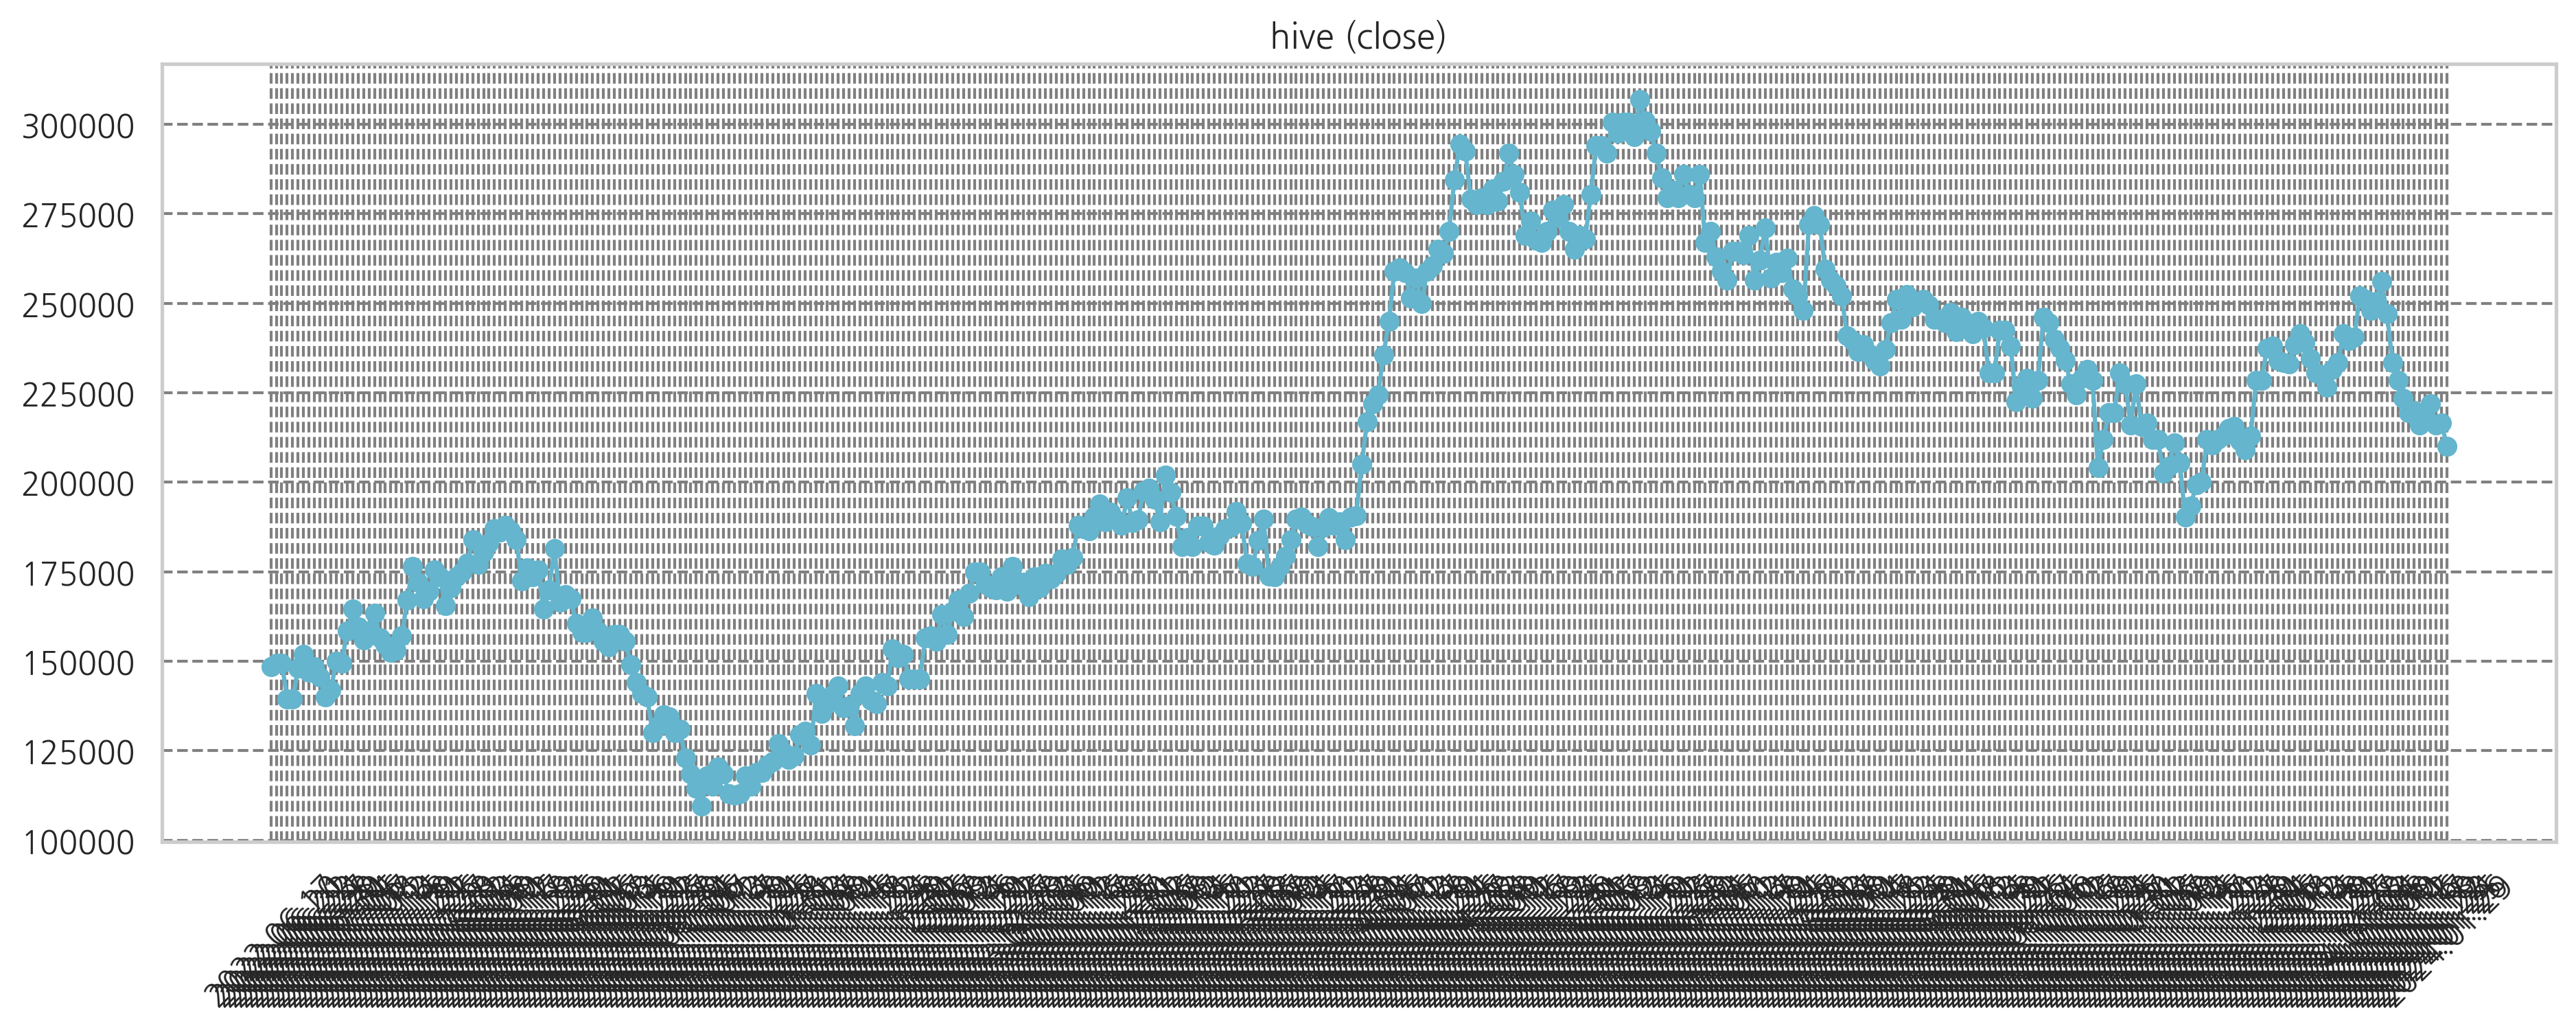

In [9]:
# 시각화
plt.figure(figsize=(15, 5)) 
plt.title('hive (close)')
plt.xticks(rotation=45) # x축 레이블의 날짜가 겹쳐서 보기어려우므로 45degree 회전
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()
